In [94]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline

import pandas as pd
import os
import numpy as np

import geopy.distance

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn.svm import LinearSVR

In [6]:
train_file = "train.csv"
folder = "data"

In [8]:
CSV_COLUMN_NAMES = pd.read_csv(os.path.join(folder,train_file), nrows=1).columns.tolist()
CSV_COLUMN_NAMES

['trip_id',
 'vendor_id',
 'pickup_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration']

In [15]:
train = pd.read_csv(os.path.join(folder,train_file), names=CSV_COLUMN_NAMES, header=0)
print("Dataset size: {}".format(len(train)))
train.head()

Dataset size: 1021050


,trip_id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,1040
1,1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,827
2,2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,614
3,3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,867
4,4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,4967


In [26]:
train_x, train_y = train, train.pop('trip_duration')
training_features = ["vendor_id", "passenger_count", "pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]
train_x = train_x[training_features]

In [27]:
train_x.vendor_id.unique()

array([2, 1])

In [31]:
point1 = train_x.pickup_latitude.iloc[0], train_x.pickup_longitude.iloc[0]
point2 = train_x.dropoff_latitude.iloc[0], train_x.dropoff_longitude.iloc[0]

geopy.distance.geodesic(point1, point2).km

2.7597016461298853

In [38]:
def calculate_distance(row):
    point1 = row["pickup_latitude"], row["pickup_longitude"]
    point2 = row["dropoff_latitude"], row["dropoff_longitude"]
    return geopy.distance.geodesic(point1, point2).km

In [39]:
train_x.apply(lambda row: calculate_distance(row),axis=1)

0           2.759702
1           1.959062
2           1.407727
3           1.976073
4          20.861805
5           0.626073
6           2.627121
7           0.723020
8           6.384137
9           7.800689
10          4.158932
11          0.883571
12         20.235383
13          2.747699
14          3.044248
15          0.632372
16         19.898278
17          1.795630
18          2.294242
19          5.590279
20          2.012373
21         23.930219
22          2.916434
23          2.825364
24          6.121695
25          2.519019
26          3.925650
27          0.490680
28          0.791235
29          1.864247
             ...    
1021020     0.692479
1021021     1.758949
1021022     1.475293
1021023     0.446398
1021024     2.655666
1021025     4.191848
1021026     2.106855
1021027     5.597601
1021028     1.877766
1021029    20.581314
1021030     1.386543
1021031     2.245993
1021032     1.717319
1021033     3.104974
1021034     0.688568
1021035     1.905991
1021036     1

In [41]:
# distances = _

In [43]:
# train_x["distance"] = distances

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


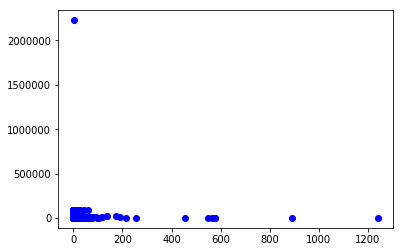

In [58]:
plt.plot(train_x.distance, train_y, 'bo')
plt.show()

In [57]:
min(train_x.passenger_count)

0

In [53]:
min(train_y)

1

In [66]:
X = train_x[["passenger_count", "distance"]].values
y = train_y.values

In [109]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
min(X_train[:,0]), max(X_train[:,0]), min(X_train[:,1]), max(X_train[:,1])

(-1.2660088607964173,
 4.05795078719967,
 -0.7600954711821992,
 273.19120417003336)

In [111]:
X_test = scaler.fit_transform(X_test)
min(X_test[:,0]), max(X_test[:,0]), min(X_test[:,1]), max(X_test[:,1])

(-1.2652349489452113,
 4.047846736152718,
 -0.8209470583227183,
 137.35461777779605)

In [77]:
X_train.shape

(684103, 2)

In [84]:
y_train = y_train.astype(float) # make it float for svm regression

In [103]:
regressor = LinearSVR(C=4.0, epsilon=100, tol=1e-5)
regressor.fit(X_train, y_train)

LinearSVR(C=4.0, dual=True, epsilon=100, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=1e-05, verbose=0)

In [112]:
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

9497251.820693726